In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import yfinance as yf
import statsmodels.api as sm

In [2]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK', 'XOM', '^GSPC' ]
weights = [0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1]

start_date = '1999-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

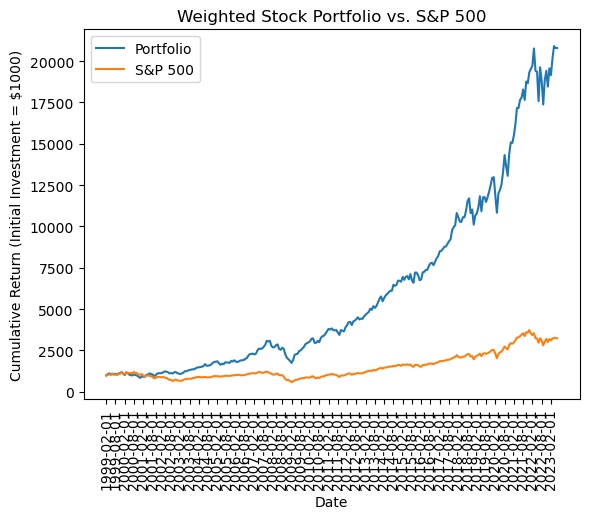

In [3]:
stock_data = pd.DataFrame()
for ticker in stocks:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']
    
stock_returns = stock_data.pct_change().dropna()

portfolio_returns = (stock_returns * weights).sum(axis=1)

sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

plt.plot(portfolio_cumulative_returns, label='Portfolio')
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


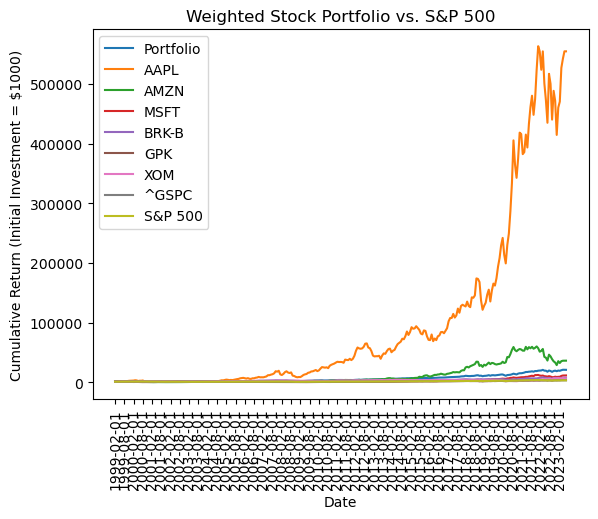

In [4]:

stock_data = pd.DataFrame()
for ticker in stocks:
    data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
    data.set_index('Date', inplace=True)
    stock_data[ticker] = data['Adj Close']

stock_returns = stock_data.pct_change().dropna()

portfolio_returns = (stock_returns * weights).sum(axis=1)

sp500_data = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1={int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())}&period2={int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())}&interval=1mo&events=history&includeAdjustedClose=true')
sp500_data.set_index('Date', inplace=True)
sp500_returns = sp500_data['Adj Close'].pct_change().dropna()

portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 1000
stock_cumulative_returns = (1 + stock_returns).cumprod() * 1000
sp500_cumulative_returns = (1 + sp500_returns).cumprod() * 1000

plt.plot(portfolio_cumulative_returns, label='Portfolio')
for ticker in stocks:
    plt.plot(stock_cumulative_returns[ticker], label=ticker)
plt.plot(sp500_cumulative_returns, label='S&P 500')
plt.legend()
plt.title('Weighted Stock Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
x_ticks = range(0, len(portfolio_cumulative_returns), 6)
x_tick_labels = pd.to_datetime(portfolio_cumulative_returns.index)[::6].strftime('%Y-%m-%d')
plt.xticks(x_ticks, x_tick_labels, rotation = 90)
plt.show()


In [5]:
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
portfolio_returns = data.pct_change().dot(weights).resample('Y').sum()
market_returns = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close'].pct_change().resample('Y').sum()
returns_table = pd.concat([portfolio_returns, market_returns], axis=1)
returns_table.columns = ['Portfolio', 'Market']
print(returns_table)

stock_returns_table = data.pct_change().resample('Y').sum()
stock_returns_table.columns = [ticker + ' Year Returns' for ticker in stocks]
print(stock_returns_table)



[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
            Portfolio    Market
Date                           
1999-12-31   0.273078  0.195589
2000-12-31  -0.509750 -0.082290
2001-12-31   0.663988 -0.116940
2002-12-31   0.111709 -0.232379
2003-12-31   0.171204  0.248721
2004-12-31   0.372077  0.092262
2005-12-31  -0.173414  0.034836
2006-12-31   0.340394  0.132697
2007-12-31   0.271184  0.047403
2008-12-31  -0.315351 -0.401459
2009-12-31   0.768671  0.247835
2010-12-31   0.187492  0.136564
2011-12-31   0.126521  0.027066
2012-12-31   0.255853  0.133880
2013-12-31   0.303685  0.265531
2014-12-31   0.186148  0.114345
2015-12-31   0.079553  0.004678
2016-12-31   0.105762  0.099646
2017-12-31   0.236138  0.179757
2018-12-31  -0.054150 -0.049921
2019-12-31   0.332307  0.261588
2020-12-31   0.214896  0.210538
2021-12-31   0.239301  0.246839
2022-12-31   0.006896 -0.187106
2023-12-31   0.145404  0.07870

In [6]:
combined_returns = pd.concat([portfolio_cumulative_returns, sp500_cumulative_returns], axis=1)
combined_returns.columns = ['Portfolio', 'S&P 500']

portfolio_value = combined_returns['Portfolio'] / combined_returns['Portfolio'][0] * 1000
sp500_value = combined_returns['S&P 500'] / combined_returns['S&P 500'][0] * 1000

investment_values = pd.concat([portfolio_value, sp500_value], axis=1)
investment_values.columns = ['Portfolio', 'S&P 500']

investment_values


,Portfolio,S&P 500
Date,,
1999-02-01,1000.000000,1000.000000
1999-03-01,1069.517616,1038.794215
1999-04-01,1114.960801,1078.210252
1999-05-01,1056.963132,1051.286824
1999-06-01,1104.830397,1108.517124
...,...,...
2023-02-01,19329.642855,3206.051733
2023-03-01,20338.717130,3318.429017
2023-04-01,21097.860107,3367.018588


In [7]:
difference = returns_table['Portfolio'] - returns_table['Market']

returns_table['Difference'] = difference

returns_table.round(2)


,Portfolio,Market,Difference
Date,,,
1999-12-31,0.27,0.20,0.08
2000-12-31,-0.51,-0.08,-0.43
2001-12-31,0.66,-0.12,0.78
2002-12-31,0.11,-0.23,0.34
2003-12-31,0.17,0.25,-0.08
2004-12-31,0.37,0.09,0.28
2005-12-31,-0.17,0.03,-0.21
2006-12-31,0.34,0.13,0.21
2007-12-31,0.27,0.05,0.22


In [8]:
stock_returns_table.round(3)

,AAPL Year Returns,AMZN Year Returns,MSFT Year Returns,BRK-B Year Returns,GPK Year Returns,XOM Year Returns,^GSPC Year Returns
Date,,,,,,,
1999-12-31,1.087,0.759,-0.204,0.052,0.576,0.162,0.196
2000-12-31,-0.779,-1.073,0.324,-0.935,-0.829,0.147,-0.082
2001-12-31,0.578,0.254,0.100,1.785,0.519,-0.049,-0.117
2002-12-31,-0.306,0.819,-0.015,0.350,-0.157,-0.042,-0.232
2003-12-31,0.468,1.122,0.165,-0.201,0.108,0.203,0.249
2004-12-31,1.185,-0.082,0.053,0.704,0.102,0.259,0.092
2005-12-31,0.879,0.126,0.009,-0.974,0.001,0.138,0.035
2006-12-31,0.238,-0.095,0.229,0.794,0.169,0.348,0.133
2007-12-31,0.920,0.980,0.267,0.012,0.215,0.246,0.047


In [9]:
average_portfolio_return = returns_table['Portfolio'].mean() * 100
average_market_return = returns_table['Market'].mean() * 100
average_portfolio_return

17.35838223126815

In [10]:
average_market_return

6.75351676258494

In [11]:
average_portfolio_return 
print(f"The average performance of the portfolio is {average_portfolio_return:.2f}% per year.")


The average performance of the portfolio is 17.36% per year.


In [12]:
average_market_return
print(f"The average performance of the market is {average_market_return:.2f}% per year.")


The average performance of the market is 6.75% per year.


In [13]:
betas = {}
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    market_data = yf.download('^GSPC', start=start_date, end=end_date)

    stock_returns = stock_data['Adj Close'].pct_change().dropna()
    market_returns = market_data['Adj Close'].pct_change().dropna()

    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    betas[stock] = results.params['Adj Close']

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

beta_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Beta
AAPL,1.158024
AMZN,1.278069
MSFT,1.109938
BRK-B,0.663498
GPK,1.284668
XOM,0.844416
^GSPC,1.000000


In [14]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)
market_returns = market_data['Adj Close'].pct_change().dropna()

betas = {}
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)

    stock_returns = stock_data['Adj Close'].pct_change().dropna()

    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X)
    results = model.fit()

    betas[stock] = results.params[1]

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

portfolio_beta = (beta_df['Beta'] * weights).sum()

print("Portfolio beta:", portfolio_beta)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Portfolio beta: 0.8665608863380467


In [15]:
portfolio_beta

0.8665608863380467

In [16]:
risk_adjusted_performance = average_portfolio_return / portfolio_beta 
risk_adjusted_performance

20.0313474851398

In [17]:
market_risk_performance = average_market_return / 1
market_risk_performance

6.75351676258494

In [18]:
corr_DF = stock_returns_table.corr().round(2)
corr_DF

,AAPL Year Returns,AMZN Year Returns,MSFT Year Returns,BRK-B Year Returns,GPK Year Returns,XOM Year Returns,^GSPC Year Returns
AAPL Year Returns,1.00,0.52,0.05,0.37,0.71,-0.06,0.64
AMZN Year Returns,0.52,1.00,-0.10,0.28,0.63,-0.38,0.43
MSFT Year Returns,0.05,-0.10,1.00,0.09,0.06,0.25,0.49
BRK-B Year Returns,0.37,0.28,0.09,1.00,0.56,-0.09,0.21
GPK Year Returns,0.71,0.63,0.06,0.56,1.00,-0.23,0.67
XOM Year Returns,-0.06,-0.38,0.25,-0.09,-0.23,1.00,0.02
^GSPC Year Returns,0.64,0.43,0.49,0.21,0.67,0.02,1.00


In [19]:
corr_DF['^GSPC Year Returns']

AAPL Year Returns     0.64
AMZN Year Returns     0.43
MSFT Year Returns     0.49
BRK-B Year Returns    0.21
GPK Year Returns      0.67
XOM Year Returns      0.02
^GSPC Year Returns    1.00
Name: ^GSPC Year Returns, dtype: float64